In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import MultipleLocator, FormatStrFormatter

In [37]:
file_name = 'KTWS8 C39-42.csv'
df = pd.read_csv(file_name)

In [38]:
df

,X,Y,Z,R,G,B,Coord._Z,Nx,Ny,Nz
0,-13.643050,18.650707,-1.117315,62,20,214,-1.117315,0.998982,-0.023810,0.038303
1,-13.645346,17.917208,-1.115445,62,20,214,-1.115445,0.999444,-0.025522,-0.021439
2,-13.646035,17.068653,-1.106037,62,20,214,-1.106037,0.904847,0.001302,-0.425734
3,-13.645791,18.530476,-1.134684,62,20,214,-1.134684,0.999179,0.007159,0.039885
4,-13.650014,18.444769,-1.119505,62,20,214,-1.119505,0.876523,-0.001326,-0.481358
...,...,...,...,...,...,...,...,...,...,...
142282,-13.648628,30.263342,-1.041355,64,202,122,-1.041355,0.199155,-0.041739,0.979079
142283,-13.650599,30.217373,-1.041726,64,202,122,-1.041726,0.255959,-0.043278,0.965718
142284,-13.632040,30.276655,-1.040646,64,202,122,-1.040646,0.235154,0.133817,0.962702
142285,-13.649645,30.286406,-1.041657,64,202,122,-1.041657,0.403592,0.009084,0.914894


In [39]:
# convert to feet
df[['lateral', 'axial', 'vertical', 'Coord._Z']] = df[['X', 'Y', 'Z', 'Coord._Z']] * 3.28084

In [40]:
df['Coord_Z'] = df['Coord._Z'] * 12

In [41]:
df['axial'].min()

np.float64(-26.319090376331598)

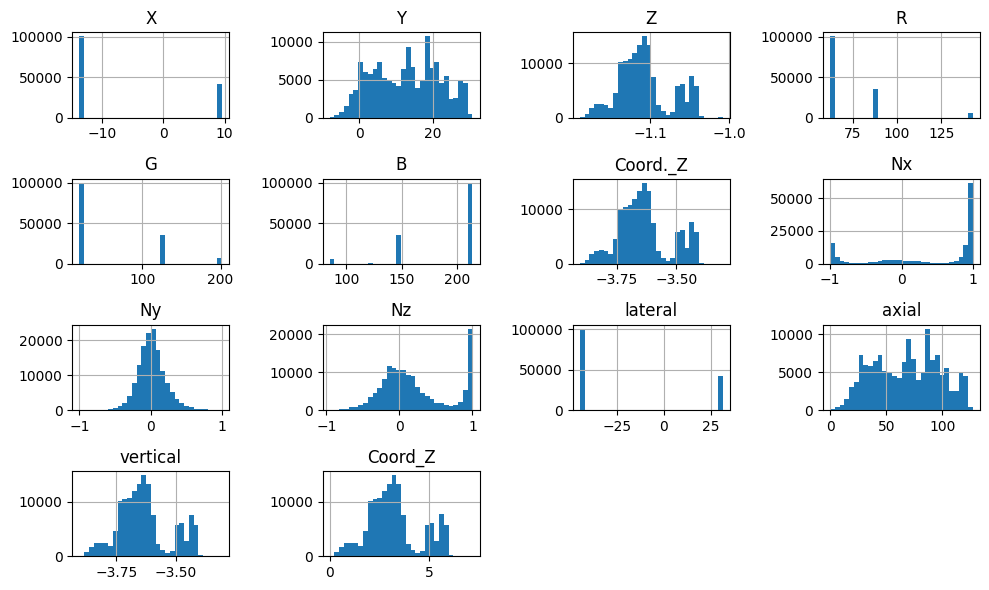

In [47]:
# Histograms for each column
df.hist(bins=30, figsize=(10, 6))
plt.tight_layout()
plt.show()

In [43]:
df['axial'] = df['axial'] - df['axial'].min()

In [44]:
df['Coord_Z'] = df['Coord_Z'] - df['Coord_Z'].min()

In [45]:
dfa =df[df['lateral'] < df['lateral'].mean()]

In [46]:
dfa

,X,Y,Z,R,G,B,Coord._Z,Nx,Ny,Nz,lateral,axial,vertical,Coord_Z
0,-13.643050,18.650707,-1.117315,62,20,214,-3.665732,0.998982,-0.023810,0.038303,-44.760665,87.509077,-3.665732,2.850906
1,-13.645346,17.917208,-1.115445,62,20,214,-3.659597,0.999444,-0.025522,-0.021439,-44.768196,85.102582,-3.659595,2.924528
2,-13.646035,17.068653,-1.106037,62,20,214,-3.628730,0.904847,0.001302,-0.425734,-44.770458,82.318610,-3.628731,3.294921
3,-13.645791,18.530476,-1.134684,62,20,214,-3.722717,0.999179,0.007159,0.039885,-44.769657,87.114616,-3.722718,2.167087
4,-13.650014,18.444769,-1.119505,62,20,214,-3.672917,0.876523,-0.001326,-0.481358,-44.783512,86.833426,-3.672916,2.764685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142282,-13.648628,30.263342,-1.041355,64,202,122,-3.416519,0.199155,-0.041739,0.979079,-44.778965,125.608273,-3.416519,5.841457
142283,-13.650599,30.217373,-1.041726,64,202,122,-3.417736,0.255959,-0.043278,0.965718,-44.785430,125.457456,-3.417737,5.826851
142284,-13.632040,30.276655,-1.040646,64,202,122,-3.414193,0.235154,0.133817,0.962702,-44.724542,125.651952,-3.414192,5.869370
142285,-13.649645,30.286406,-1.041657,64,202,122,-3.417510,0.403592,0.009084,0.914894,-44.782301,125.683941,-3.417509,5.829567


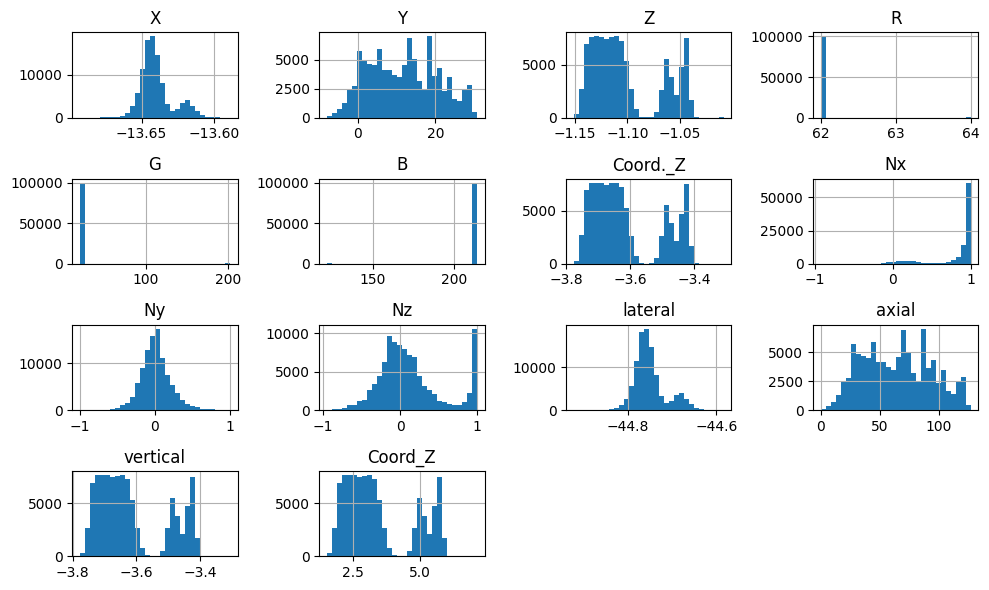

In [48]:
# Histograms for each column
dfa.hist(bins=30, figsize=(10, 6))
plt.tight_layout()
plt.show()

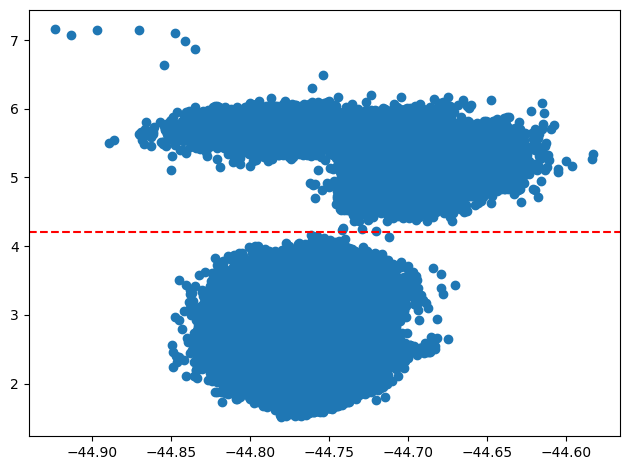

In [50]:
plt.scatter(dfa['lateral'], dfa['Coord_Z'])
plt.axhline(y=4.2, color='red', linestyle='--')
plt.tight_layout()
plt.show()

In [51]:
dfa_web =dfa[dfa['Coord_Z'] < 4.2]

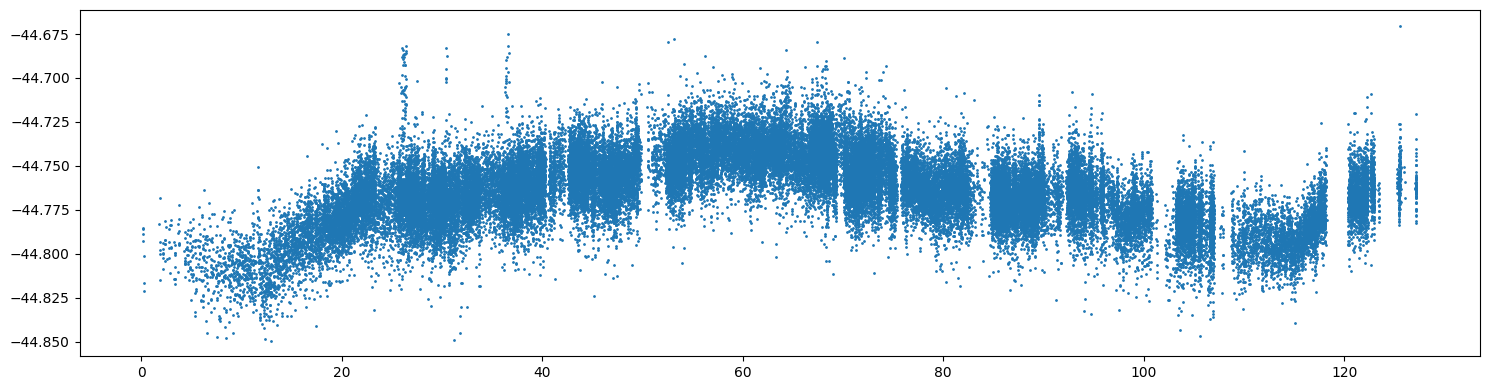

In [52]:
plt.figure(figsize=(15, 4))
plt.scatter(dfa_web['axial'], dfa_web['lateral'], s=1)
plt.tight_layout()
plt.show()

In [53]:
rail_length = df['axial'].max() - df['axial'].min()
print(f"Rail length: {rail_length:.2f} ft")

Rail length: 127.18 ft


Averaged 111 stations


,axial_in,lateral_in,vertical_in,count
0,2.49705,-537.538921,-43.715439,5
1,26.49705,-537.602731,-44.148233,6
2,74.49705,-537.737109,-43.994504,6
3,86.49705,-537.784500,-44.266226,7
4,98.49705,-537.630920,-44.011789,7


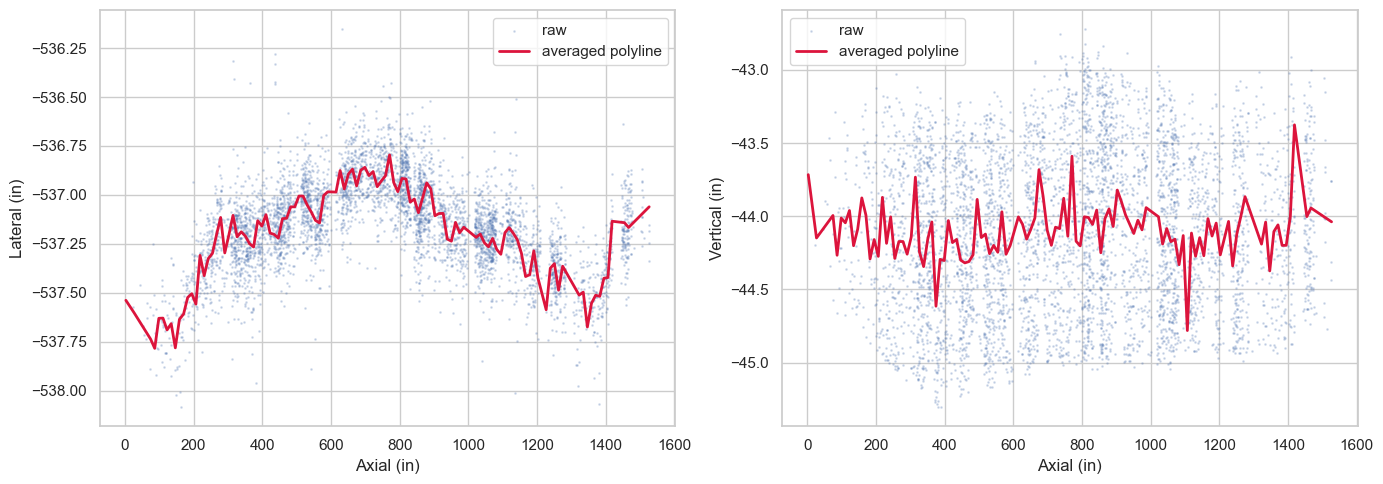

In [55]:
sns.set(context='notebook', style='whitegrid')

# --- PARAMETERS ---
station_step_in = 12.0    # spacing between stations in inches
strip_width_in = 1.0     # width of strip in inches
units = 'ft'             # your data is in feet
min_points = 5           # minimum points per strip

# --- CONVERT TO INCHES ---
conv = 12.0 
df_in = dfa_web[['axial','lateral','vertical']] * conv
df_in.columns = ['axial_in','lateral_in','vertical_in']

# --- BUILD STATIONS ---
start = df_in['axial_in'].min()
stop  = df_in['axial_in'].max()
stations = np.arange(start, stop + station_step_in, station_step_in)
half_w = strip_width_in / 2.0

# --- AVERAGE POINTS ---
rows = []
for st in stations:
    mask = (df_in['axial_in'] >= st - half_w) & (df_in['axial_in'] <= st + half_w)
    chunk = df_in.loc[mask]
    if len(chunk) >= min_points:
        rows.append({
            'axial_in': st,
            'lateral_in': chunk['lateral_in'].mean(),
            'vertical_in': chunk['vertical_in'].mean(),
            'count': len(chunk)
        })

avg_pts = pd.DataFrame(rows)
print(f"Averaged {len(avg_pts)} stations")
display(avg_pts.head())

# --- PLOT ---
fig, axs = plt.subplots(1, 2, figsize=(14, 5))

# Downsample raw data for clarity
sample = df_in.sample(min(len(df_in), 5000), random_state=42)

# Plot lateral vs axial
axs[0].scatter(sample['axial_in'], sample['lateral_in'], s=1, alpha=0.2, label='raw')
axs[0].plot(avg_pts['axial_in'], avg_pts['lateral_in'], color='crimson', lw=2, label='averaged polyline')
axs[0].set_xlabel('Axial (in)'); axs[0].set_ylabel('Lateral (in)'); axs[0].legend()

# Plot vertical vs axial
axs[1].scatter(sample['axial_in'], sample['vertical_in'], s=1, alpha=0.2, label='raw')
axs[1].plot(avg_pts['axial_in'], avg_pts['vertical_in'], color='crimson', lw=2, label='averaged polyline')
axs[1].set_xlabel('Axial (in)'); axs[1].set_ylabel('Vertical (in)'); axs[1].legend()

plt.tight_layout()
plt.show()


Windows evaluated: 429
Worst-case deviation: 0.486 in at axial center 1310.5 in
Windows meeting 1/4" in 20 ft: 73.9%


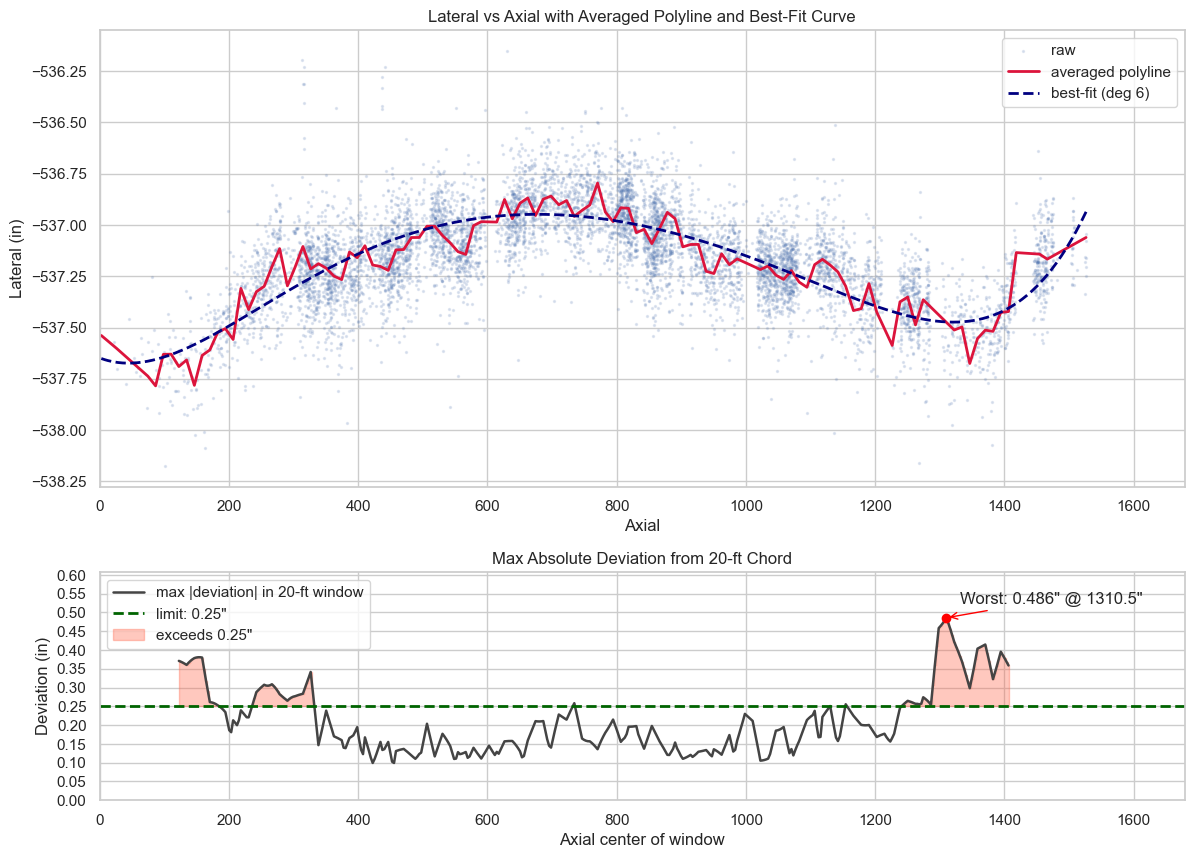

In [58]:

sns.set(context='notebook', style='whitegrid')

# =========================
# 1) Ensure averaged polyline exists (3" stations, 1" strip)
#    If you already have `avg_pts` from earlier, this block will be skipped.
# =========================
if 'avg_pts' not in locals():
    # Build from df that has columns in FEET: ['axial','lateral','vertical']
    station_step_in = 3.0
    strip_width_in  = 1.0
    min_points      = 5

    conv = 12.0  # ft -> in
    df_in = dfa_web[['axial','lateral','vertical']].copy()*conv
    df_in.columns = ['axial_in','lateral_in','vertical_in']

    start = df_in['axial_in'].min()
    stop  = df_in['axial_in'].max()
    stations = np.arange(start, stop + station_step_in, station_step_in)
    half_w = strip_width_in/2

    rows = []
    for st in stations:
        mask = (df_in['axial_in'] >= st - half_w) & (df_in['axial_in'] <= st + half_w)
        chunk = df_in.loc[mask]
        if len(chunk) >= min_points:
            rows.append({
                'axial_in': st,
                'lateral_in': chunk['lateral_in'].mean(),
                'vertical_in': chunk['vertical_in'].mean(),
                'count': len(chunk)
            })
    avg_pts = pd.DataFrame(rows)

if avg_pts.empty:
    raise ValueError("No averaged stations available. Adjust strip width/min_points or verify data coverage.")

# Sort & ensure unique axial positions for interpolation
avg_pts = avg_pts.sort_values('axial_in').drop_duplicates(subset='axial_in')

# =========================
# 2) Compute moving 20-ft chord deviation
# =========================
WINDOW_LEN_IN = 20 * 12  # 240 inches
STEP_IN = 3.0            # slide by 3" (same as stationing)
LIMIT_IN = 0.25          # 1/4 inch

x = avg_pts['axial_in'].values
y = avg_pts['lateral_in'].values

# Helper: lateral at arbitrary axial via linear interpolation
def interp_lateral(xq):
    return np.interp(xq, x, y)

window_starts = np.arange(x.min(), x.max() - WINDOW_LEN_IN + STEP_IN, STEP_IN)
records = []

for s in window_starts:
    e = s + WINDOW_LEN_IN
    # Skip if end falls beyond range
    if e > x.max():
        continue

    # Indices of averaged points inside [s, e]
    mask = (x >= s) & (x <= e)
    # If sparse, also include the end points via interpolation
    xw = x[mask]
    yw = y[mask]

    # Guarantee we evaluate at start and end by inserting endpoints
    if len(xw) == 0 or xw[0] > s:
        xw = np.insert(xw, 0, s)
        yw = np.insert(yw, 0, interp_lateral(s))
    if xw[-1] < e:
        xw = np.append(xw, e)
        yw = np.append(yw, interp_lateral(e))

    # Chord line y = y0 + (y1 - y0) * (x - s)/L
    y0 = yw[0]
    y1 = yw[-1]
    L  = e - s
    y_chord = y0 + (y1 - y0) * (xw - s) / L

    # Deviations from chord
    dev = yw - y_chord
    max_abs_dev = np.max(np.abs(dev))

    records.append({
        'start_in': s,
        'end_in': e,
        'center_in': (s+e)/2,
        'max_abs_dev_in': max_abs_dev
    })

dev_df = pd.DataFrame(records)
if dev_df.empty:
    raise ValueError("Span is shorter than 20 ft; cannot compute chord deviations.")

# Summary stats
worst_idx = dev_df['max_abs_dev_in'].idxmax()
worst_dev = dev_df.loc[worst_idx, 'max_abs_dev_in']
worst_center = dev_df.loc[worst_idx, 'center_in']
pass_rate = (dev_df['max_abs_dev_in'] <= LIMIT_IN).mean() * 100.0

print(f"Windows evaluated: {len(dev_df)}")
print(f"Worst-case deviation: {worst_dev:.3f} in at axial center {worst_center:.1f} in")
print(f"Windows meeting 1/4\" in 20 ft: {pass_rate:.1f}%")

# =========================
# 3) Plot
#    A) Lateral vs Axial with averaged polyline + optional best-fit curve
#    B) Max deviation per 20-ft window vs axial (center), with 0.25" limit
# =========================
fig = plt.figure(figsize=(14, 10))
gs = fig.add_gridspec(2, 1, height_ratios=[2, 1], hspace=0.25)

# --- A) Lateral vs Axial ---
ax1 = fig.add_subplot(gs[0])

# Raw (downsample for clarity if df exists)
if 'df' in locals():
    df_in = dfa_web[['axial','lateral']].copy()*12.0
    df_in.columns = ['axial_in','lateral_in']
    raw_sample = df_in.sample(min(len(df_in), 8000), random_state=42)
    ax1.scatter(raw_sample['axial_in'], raw_sample['lateral_in'],
                s=2, alpha=0.15, label='raw')

# Averaged polyline
ax1.plot(avg_pts['axial_in'], avg_pts['lateral_in'], color='crimson', lw=2, label='averaged polyline')

# Optional: best-fit curve (cubic)
deg = 6
coefs = np.polyfit(avg_pts['axial_in'], avg_pts['lateral_in'], deg)
x_fit = np.linspace(avg_pts['axial_in'].min(), avg_pts['axial_in'].max(), 600)
y_fit = np.polyval(coefs, x_fit)
ax1.plot(x_fit, y_fit, color='navy', lw=2, ls='--', label=f'best-fit (deg {deg})')

ax1.set_title('Lateral vs Axial with Averaged Polyline and Best-Fit Curve')
ax1.set_xlabel('Axial')
ax1.set_ylabel('Lateral (in)')
ax1.legend(loc='best')

# --- B) 20-ft chord deviation vs axial ---
ax2 = fig.add_subplot(gs[1])

ax2.plot(dev_df['center_in'], dev_df['max_abs_dev_in'], color='#444', lw=1.8, label='max |deviation| in 20-ft window')
ax2.axhline(LIMIT_IN, color='darkgreen', lw=2, ls='--', label='limit: 0.25"')

# Highlight exceedances
exceed = dev_df['max_abs_dev_in'] > LIMIT_IN
ax2.fill_between(dev_df['center_in'], dev_df['max_abs_dev_in'],
                 LIMIT_IN, where=exceed, color='tomato', alpha=0.35, step='mid', label='exceeds 0.25"')

# Annotate worst case
ax2.scatter([worst_center], [worst_dev], color='red', zorder=3)
ax2.annotate(f'Worst: {worst_dev:.3f}" @ {worst_center:.1f}"',
             xy=(worst_center, worst_dev), xytext=(10, 10), textcoords='offset points',
             arrowprops=dict(arrowstyle='->', color='red'))

ax2.set_title('Max Absolute Deviation from 20-ft Chord')
ax2.set_xlabel('Axial center of window')
ax2.set_ylabel('Deviation (in)')
ax2.legend(loc='best')
ax2.set_ylim(0, 1.25 * max(dev_df['max_abs_dev_in'].max(), LIMIT_IN))

ax2.yaxis.set_major_locator(MultipleLocator(0.05))
ax2.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))


xmax = max(
    avg_pts['axial_in'].max(),
    dev_df['center_in'].max(),
    (df['axial'].max() * 12.0) if 'df' in locals() else 0
)
xmax *= 1.10  # add 10%

ax1.set_xlim(0, xmax)
ax2.set_xlim(0, xmax)

plt.show()
